In [1]:
# Load Data
import zipfile
with zipfile.ZipFile('BBC News Summary.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [4]:
import os
business_texts=os.listdir('BBC News Summary/News Articles/business')

import os
entertainment_texts=os.listdir('BBC News Summary/News Articles/entertainment')

import os
politics_texts=os.listdir('BBC News Summary/News Articles/politics')

import os
sport_texts=os.listdir('BBC News Summary/News Articles/sport')

import os
tech_texts=os.listdir('BBC News Summary/News Articles/tech')

In [5]:
def clean_text(text):
    
    text=text.lower()
    text=' '.join([contraction_mapping[i] if i in contraction_mapping.keys() else i for i in text.split()])
    text=re.sub(r'\(.*\)',"",text)
    text=re.sub("'s","",text)
    text=re.sub('"','',text)
    text=' '.join([i for i in text.split() if i.isalpha()])
    text=re.sub('[^a-zA-Z]'," ",text)
    
    return text

#### Articles Business

In [6]:
# tokenization
import nltk
nltk.download('punkt') # one time execution
from nltk.tokenize import sent_tokenize
sentences = []
root='bbc news summary/BBC News Summary/News Articles/business'
for s in business_texts:
  file_ = open(root+'/'+s, "r") 
  business_file=file_.read().replace('\n', '.')
  business_file=business_file.split('.')
  for sent in business_file:
    if sent!='':
      if sent[0].isdigit():
        sentences[-1][0]+=sent_tokenize(sent)[0]
      else:
        sentences.append(sent_tokenize(sent))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
# Print Sentences
sentences

[['Ad sales boost Time Warner profit'],
 ['Quarterly profits at US media giant TimeWarner jumped 76% to $113bn (Â£600m) for the three months to December, from $639m year-earlier'],
 ['The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales'],
 [' TimeWarner said fourth quarter sales rose 2% to $111bn from $109bn'],
 [' Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL'],
 ['Time Warner said on Friday that it now owns 8% of search-engine Google'],
 [' But its own internet business, AOL, had has mixed fortunes'],
 [' It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters'],
 [" However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues"],
 [" It hopes to increase subscribers by offering the online service free to TimeWar

In [8]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2020-12-29 08:13:23--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu... 171.64.67.140
Connecting to nlp.stanford.edu|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
https://nlp.stanford.edu/data/glove.6B.zip: HTTPS support not compiled in.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
import re
clean_sentences = []
ind=0
while ind < len(sentences):
  i=sentences[ind]
  regex = re.compile('[^a-zA-Z]')
  if len(i)!=0:
    clean_sentences.append(regex.sub(' ', i[0]))
    ind+=1
  else:
    del sentences[ind]

clean_sentences = [s.lower() for s in clean_sentences]

In [10]:
stop_words= ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'between',
 'into',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'other',
 'some',
 'such',
 'only',
 'own',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'now',
 'm',
 'd',
 'll',
 'could',
 'would',
 'more',
 'also',
 'said',
 'mr',
 'however',
 'may']

In [11]:
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [12]:
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [13]:
# Extract word vectors
import numpy as np
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [14]:
import pandas as pd
business_words={}
for i in clean_sentences:
  if len(i)!=0:
    for w in i.split():
      if w not in business_words:
        business_words[w]=1
      else:
        business_words[w]+=1
        
bs_words=pd.DataFrame.from_dict({'words':list(business_words.keys()),'counts':list(business_words.values()) })
bs_words=bs_words.set_index('words')

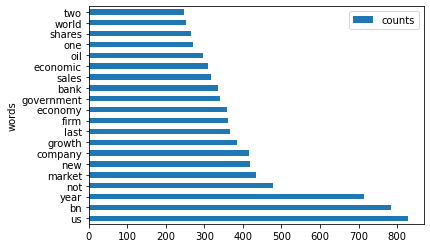

In [37]:
top_twenty=bs_words.nlargest(20, ['counts'])
ax = top_twenty.plot.barh(x=None, y='counts', rot=0)

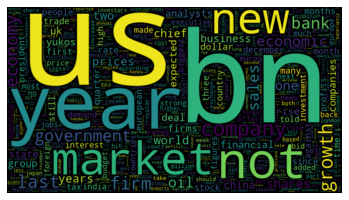

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(business_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(np.array(v))

sentence_vectors=np.array(sentence_vectors)

In [18]:
def cosine_similarities(mat):
  norm = (mat.T * mat.T).sum(0, keepdims=True) ** .5
  return (mat @ mat.T ) / norm.T / norm 

sim_mat=cosine_similarities(sentence_vectors)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
from scipy import sparse
sim_mat[sim_mat < 0.9]=0
for i in range(8684):
  sim_mat[i,i] = 0
sim_mat[np.isnan(sim_mat)] =0
sparse_mat = sparse.csr_matrix(sim_mat)
sparse_mat.eliminate_zeros()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


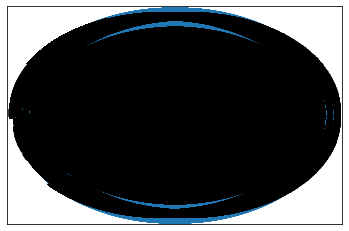

In [20]:
import networkx as nx
SimilarityGraph = nx.from_scipy_sparse_matrix(sparse_mat)
#print the graph
nx.draw_networkx(SimilarityGraph,pos=nx.shell_layout(SimilarityGraph), with_labels=True)

In [21]:
scores = nx.pagerank(SimilarityGraph)
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)
# Extract top 10 sentences as the summary
for i in range(10):
  print(ranked_sentences[i][1])

[" However, analysts say they expected most shareholders would be holding back from selling all their shares immediately, as Google's good performance and future growth potential means demand will hold"]
["Thursday's new low for the dollar came after data was released showing year-on-year sales of new homes in the US had fallen 12% in November - with some analysts saying this could indicate problems ahead for consumer activity"]
['" Mr Majumdar also said an assessment should be made as to whether foreign investment is indeed beneficial to the country - in terms of employment and money generated - or just another way of international companies filling their deep pockets']
["Most EU countries have failed to put in place policies aimed at making Europe the world's most competitive economy by the end of the decade, a report says"]
['" The CBI found some firms managed to increase prices for the first time in nine years - but many said increases failed to keep up the rise in costs']
[" Job c

**Articles Sport**

In [22]:
# tokenization
import nltk
nltk.download('punkt') # one time execution
from nltk.tokenize import sent_tokenize
sentences = []
root='bbc news summary/BBC News Summary/News Articles/sport'
for s in sport_texts:
  file_ = open(root+'/'+s, "r", encoding= 'unicode_escape') 
  sport_file=file_.read().replace('\n', '.')
  sport_file=sport_file.split('.')
  for sent in sport_file:
    if sent!='':
      if sent[0].isdigit():
        sentences[-1][0]+=sent_tokenize(sent)[0]
      else:
        sentences.append(sent_tokenize(sent))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
# Print Sentences
sentences

[['Claxton hunting first major medal'],
 ["British hurdler Sarah Claxton is confident she can win her first major medal at next month's European Indoor Championships in Madrid"],
 ['The 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 796 seconds to win the AAAs title'],
 [' "I am quite confident," said Claxton'],
 [' "But I take each race as it comes'],
 [' "As long as I keep up my training but not do too much I think there is a chance of a medal'],
 ['" Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage'],
 [' Now, the Scotland-born athlete owns the equal fifth-fastest time in the world this year'],
 [" And at last week's Birmingham Grand Prix, Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot"],
 ['For the first time, Claxton has only been preparing for a campaign over the hurdles - which c

In [24]:
import re
clean_sentences = []
ind=0
while ind < len(sentences):
  i=sentences[ind]
  regex = re.compile('[^a-zA-Z]')
  if len(i)!=0:
    clean_sentences.append(regex.sub(' ', i[0]))
    ind+=1
  else:
    del sentences[ind]

clean_sentences = [s.lower() for s in clean_sentences]

In [25]:
stop_words= ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'between',
 'into',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'other',
 'some',
 'such',
 'only',
 'own',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'now',
 'm',
 'd',
 'll',
 'could',
 'would',
 'more',
 'also',
 'said',
 'mr',
 'however',
 'may']

In [26]:
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [27]:
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [28]:
# Extract word vectors
import numpy as np
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [29]:
import pandas as pd
sport_words={}
for i in clean_sentences:
  if len(i)!=0:
    for w in i.split():
      if w not in sport_words:
        sport_words[w]=1
      else:
        sport_words[w]+=1
        
sp_words=pd.DataFrame.from_dict({'words':list(sport_words.keys()),'counts':list(sport_words.values()) })
sp_words=sp_words.set_index('words')

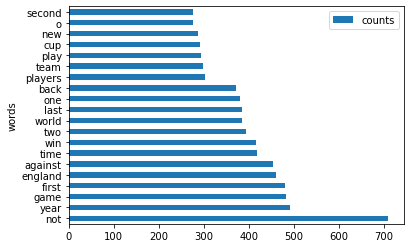

In [30]:
top_twenty=sp_words.nlargest(20, ['counts'])
ax = top_twenty.plot.barh(x=None, y='counts', rot=0)

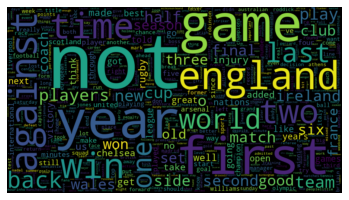

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(sport_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(np.array(v))

sentence_vectors=np.array(sentence_vectors)

In [33]:
def cosine_similarities(mat):
  norm = (mat.T * mat.T).sum(0, keepdims=True) ** .5
  return (mat @ mat.T ) / norm.T / norm 

sim_mat=cosine_similarities(sentence_vectors)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
from scipy import sparse
sim_mat[sim_mat < 0.9]=0
for i in range(8684):
  sim_mat[i,i] = 0
sim_mat[np.isnan(sim_mat)] =0
sparse_mat = sparse.csr_matrix(sim_mat)
sparse_mat.eliminate_zeros()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


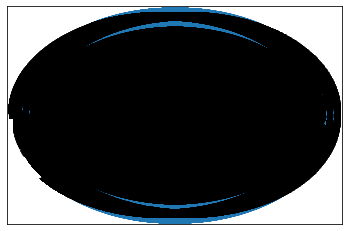

In [35]:
import networkx as nx
SimilarityGraph = nx.from_scipy_sparse_matrix(sparse_mat)
#print the graph
nx.draw_networkx(SimilarityGraph,pos=nx.shell_layout(SimilarityGraph), with_labels=True)

In [36]:
scores = nx.pagerank(SimilarityGraph)
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)
# Extract top 10 sentences as the summary
for i in range(10):
  print(ranked_sentences[i][1])

["Despite England's dramatic dip in form since the World Cup final - they have lost eight of their last 13 matches - Ireland coach Eddie O'Sullivan says his side should not underestimate the visitors"]
['"Getting my first England cap against Ireland six years ago was something I\'ll never forget because to play for your country is very special']
[' "There is a chance for us now to go on, win our home games and why not win the group, even though it\'s a tough one," said the Liverpool player']
['"All three players have shown outstanding form of late, most recently in the England A win against France A and for their club," added Robinson']
["England's World Cup-winning fly-half said last week he was hoping to recover from his latest injury in time to play some role in the championship"]
[' On Wednesday night Toshack takes charge of his first match since replacing Hughes, and Giggs said: "It\'s my 50th cap and I am looking forward to it, and I hope to play a lot more times from here on in'

**Articles Politics**

In [38]:
# tokenization
import nltk
nltk.download('punkt') # one time execution
from nltk.tokenize import sent_tokenize
sentences = []
root='bbc news summary/BBC News Summary/News Articles/politics'
for s in politics_texts:
  file_ = open(root+'/'+s, "r") 
  politics_file=file_.read().replace('\n', '.')
  politics_file=politics_file.split('.')
  for sent in politics_file:
    if sent!='':
      if sent[0].isdigit():
        sentences[-1][0]+=sent_tokenize(sent)[0]
      else:
        sentences.append(sent_tokenize(sent))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
# Print Sentences
sentences

[['Labour plans maternity pay rise'],
 ['Maternity pay for new mothers is to rise by Â£1,400 as part of new proposals announced by the Trade and Industry Secretary Patricia Hewitt'],
 ["It would mean paid leave would be increased to nine months by 2007, Ms Hewitt told GMTV's Sunday programme"],
 [' Other plans include letting maternity pay be given to fathers and extending rights to parents of older children'],
 [' The Tories dismissed the maternity pay plan as "desperate", while the Liberal Democrats said it was misdirected'],
 ['Ms Hewitt said: "We have already doubled the length of maternity pay, it was 13 weeks when we were elected, we have already taken it up to 26 weeks'],
 [' "We are going to extend the pay to nine months by 2007 and the aim is to get it right up to the full 12 months by the end of the next Parliament'],
 ['" She said new mothers were already entitled to 12 months leave, but that many women could not take it as only six of those months were paid'],
 [' "We have 

In [40]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2020-12-29 08:21:56--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu... 171.64.67.140
Connecting to nlp.stanford.edu|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
https://nlp.stanford.edu/data/glove.6B.zip: HTTPS support not compiled in.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [41]:
import re
clean_sentences = []
ind=0
while ind < len(sentences):
  i=sentences[ind]
  regex = re.compile('[^a-zA-Z]')
  if len(i)!=0:
    clean_sentences.append(regex.sub(' ', i[0]))
    ind+=1
  else:
    del sentences[ind]

clean_sentences = [s.lower() for s in clean_sentences]

In [42]:
stop_words= ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'between',
 'into',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'other',
 'some',
 'such',
 'only',
 'own',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'now',
 'm',
 'd',
 'll',
 'could',
 'would',
 'more',
 'also',
 'said',
 'mr',
 'however',
 'may']

In [43]:
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [44]:
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [45]:
# Extract word vectors
import numpy as np
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [46]:
import pandas as pd
politics_words={}
for i in clean_sentences:
  if len(i)!=0:
    for w in i.split():
      if w not in politics_words:
        politics_words[w]=1
      else:
        politics_words[w]+=1
        
pl_words=pd.DataFrame.from_dict({'words':list(politics_words.keys()),'counts':list(politics_words.values()) })
pl_words=pl_words.set_index('words')

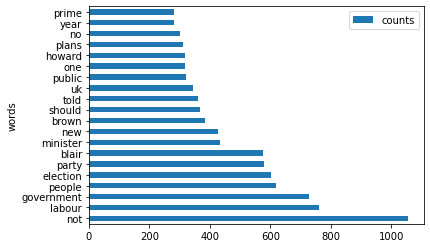

In [47]:
top_twenty=pl_words.nlargest(20, ['counts'])
ax = top_twenty.plot.barh(x=None, y='counts', rot=0)

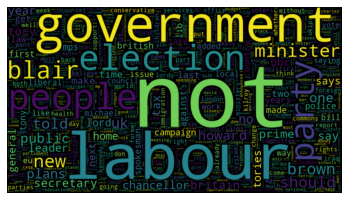

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(politics_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [49]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(np.array(v))

sentence_vectors=np.array(sentence_vectors)

In [50]:
def cosine_similarities(mat):
  norm = (mat.T * mat.T).sum(0, keepdims=True) ** .5
  return (mat @ mat.T ) / norm.T / norm 

sim_mat=cosine_similarities(sentence_vectors)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
from scipy import sparse
sim_mat[sim_mat < 0.9]=0
for i in range(6777):
  sim_mat[i,i] = 0
sim_mat[np.isnan(sim_mat)] =0
sparse_mat = sparse.csr_matrix(sim_mat)
sparse_mat.eliminate_zeros()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


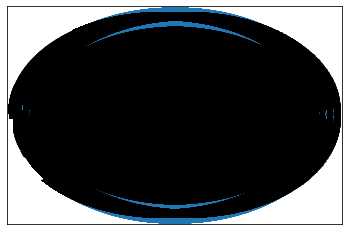

In [52]:
import networkx as nx
SimilarityGraph = nx.from_scipy_sparse_matrix(sparse_mat)
#print the graph
nx.draw_networkx(SimilarityGraph,pos=nx.shell_layout(SimilarityGraph), with_labels=True)

In [53]:
scores = nx.pagerank(SimilarityGraph)
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)
# Extract top 10 sentences as the summary
for i in range(10):
  print(ranked_sentences[i][1])

['And on Thursday Mr Blair is saying: "I want to talk about the central purpose ofNew Labour - which is to increase personal prosperity and well-being, not justfor a few but for all']
[' He added: "Over the last year I have seen many statements from senior figures of this government insisting the public must have the right of choice']
['A general election is the best chance most pressure groups get to make a real impact on government policy']
['The proposals, which would be brought in if the Conservatives won the General Election, would not apply to people coming to the UK for less than six months unless they intended to work in health or childcare or teaching']
[" The EU's comments last week about Michael Howard's plans to reform immigration show how little we govern our own country when they can turn round and say immigration is a matter for the EU and not individual member states"]
[' He also believes being the only major party promising to increases taxes will not land him in the s

**Articles Tech**

In [54]:
# tokenization
import nltk
nltk.download('punkt') # one time execution
from nltk.tokenize import sent_tokenize
sentences = []
root='bbc news summary/BBC News Summary/News Articles/tech'
for s in tech_texts:
  file_ = open(root+'/'+s, "r") 
  tech_file=file_.read().replace('\n', '.')
  tech_file=tech_file.split('.')
  for sent in tech_file:
    if sent!='':
      if sent[0].isdigit():
        sentences[-1][0]+=sent_tokenize(sent)[0]
      else:
        sentences.append(sent_tokenize(sent))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [55]:
# Print Sentences
sentences

[['Ink helps drive democracy in Asia'],
 ["The Kyrgyz Republic, a small, mountainous state of the former Soviet republic, is using invisible ink and ultraviolet readers in the country's elections as part of a drive to prevent multiple voting"],
 ['This new technology is causing both worries and guarded optimism among different sectors of the population'],
 [' In an effort to live up to its reputation in the 1990s as "an island of democracy", the Kyrgyz President, Askar Akaev, pushed through the law requiring the use of ink during the upcoming Parliamentary and Presidential elections'],
 [' The US government agreed to fund all expenses associated with this decision'],
 ['The Kyrgyz Republic is seen by many experts as backsliding from the high point it reached in the mid-1990s with a hastily pushed through referendum in 2003, reducing the legislative branch to one chamber with 75 deputies'],
 [' The use of ink is only one part of a general effort to show commitment towards more open elec

In [56]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2020-12-29 08:27:41--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu... 171.64.67.140
Connecting to nlp.stanford.edu|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
https://nlp.stanford.edu/data/glove.6B.zip: HTTPS support not compiled in.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [57]:
import re
clean_sentences = []
ind=0
while ind < len(sentences):
  i=sentences[ind]
  regex = re.compile('[^a-zA-Z]')
  if len(i)!=0:
    clean_sentences.append(regex.sub(' ', i[0]))
    ind+=1
  else:
    del sentences[ind]

clean_sentences = [s.lower() for s in clean_sentences]

In [58]:
stop_words= ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'between',
 'into',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'other',
 'some',
 'such',
 'only',
 'own',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'now',
 'm',
 'd',
 'll',
 'could',
 'would',
 'more',
 'also',
 'said',
 'mr',
 'however',
 'may']

In [59]:
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [60]:
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [61]:
# Extract word vectors
import numpy as np
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [62]:
import pandas as pd
tech_words={}
for i in clean_sentences:
  if len(i)!=0:
    for w in i.split():
      if w not in tech_words:
        tech_words[w]=1
      else:
        tech_words[w]+=1
        
tch_words=pd.DataFrame.from_dict({'words':list(tech_words.keys()),'counts':list(tech_words.values()) })
tch_words=tch_words.set_index('words')

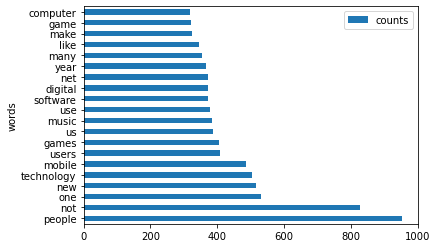

In [63]:
top_twenty=tch_words.nlargest(20, ['counts'])
ax = top_twenty.plot.barh(x=None, y='counts', rot=0)

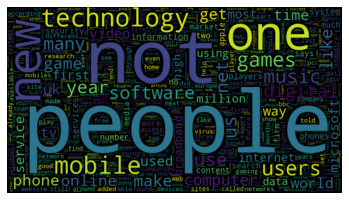

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(tech_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [65]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(np.array(v))

sentence_vectors=np.array(sentence_vectors)

In [66]:
def cosine_similarities(mat):
  norm = (mat.T * mat.T).sum(0, keepdims=True) ** .5
  return (mat @ mat.T ) / norm.T / norm 

sim_mat=cosine_similarities(sentence_vectors)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
from scipy import sparse
sim_mat[sim_mat < 0.9]=0
for i in range(8684):
  sim_mat[i,i] = 0
sim_mat[np.isnan(sim_mat)] =0
sparse_mat = sparse.csr_matrix(sim_mat)
sparse_mat.eliminate_zeros()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


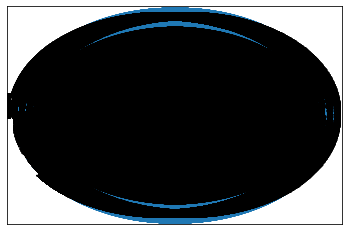

In [68]:
import networkx as nx
SimilarityGraph = nx.from_scipy_sparse_matrix(sparse_mat)
#print the graph
nx.draw_networkx(SimilarityGraph,pos=nx.shell_layout(SimilarityGraph), with_labels=True)

In [69]:
scores = nx.pagerank(SimilarityGraph)
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)
# Extract top 10 sentences as the summary
for i in range(10):
  print(ranked_sentences[i][1])

[' Companies like Microsoft and Sony believe that there is a lot of money to be made by putting a computer underneath the TV of every household and then offering services such as music and video downloads, as well as giving an individual access to all the media they already own in one place']
[' The fact that Europeans are far larger public transport users than Americans is one reason why portable media will take off in the coming year too']
[" Games, cameras and music players have all been added to our handsets in the last few years, but 2005 could see another big innovation that won't just see a change in our mobile phone habits - it might alter the way we listen to the radio"]
[' In the future, Dr Nielsen believes that search engines will play an even bigger part in helping people get to grips with the huge amount of information online']
[' "Some people will want to do their own thing on their computer but the feedback to us is that customers often have to print two or three picture

### Artichles Entertainment

In [70]:
# tokenization
import nltk
nltk.download('punkt') # one time execution
from nltk.tokenize import sent_tokenize
sentences = []
root='bbc news summary/BBC News Summary/News Articles/entertainment'
for s in entertainment_texts:
  file_ = open(root+'/'+s, "r") 
  entertainment_file=file_.read().replace('\n', '.')
  entertainment_file=entertainment_file.split('.')
  for sent in entertainment_file:
    if sent!='':
      if sent[0].isdigit():
        sentences[-1][0]+=sent_tokenize(sent)[0]
      else:
        sentences.append(sent_tokenize(sent))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [71]:
# Print Sentences
sentences

[['Gallery unveils interactive tree'],
 ["A Christmas tree that can receive text messages has been unveiled at London's Tate Britain art gallery"],
 ['The spruce has an antenna which can receive Bluetooth texts sent by visitors to the Tate'],
 [' The messages will be "unwrapped" by sculptor Richard Wentworth, who is responsible for decorating the tree with broken plates and light bulbs'],
 [' It is the 17th year that the gallery has invited an artist to dress their Christmas tree'],
 [' Artists who have decorated the Tate tree in previous years include Tracey Emin in 2002'],
 ["The plain green Norway spruce is displayed in the gallery's foyer"],
 [' Its light bulb adornments are dimmed, ordinary domestic ones joined together with string'],
 [" The plates decorating the branches will be auctioned off for the children's charity ArtWorks"],
 [' Wentworth worked as an assistant to sculptor Henry Moore in the late 1960s'],
 [' His reputation as a sculptor grew in the 1980s, while he has bee

In [72]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2020-12-29 08:42:28--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu... 171.64.67.140
Connecting to nlp.stanford.edu|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
https://nlp.stanford.edu/data/glove.6B.zip: HTTPS support not compiled in.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [73]:
import re
clean_sentences = []
ind=0
while ind < len(sentences):
  i=sentences[ind]
  regex = re.compile('[^a-zA-Z]')
  if len(i)!=0:
    clean_sentences.append(regex.sub(' ', i[0]))
    ind+=1
  else:
    del sentences[ind]

clean_sentences = [s.lower() for s in clean_sentences]

In [74]:
stop_words= ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'between',
 'into',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'other',
 'some',
 'such',
 'only',
 'own',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'now',
 'm',
 'd',
 'll',
 'could',
 'would',
 'more',
 'also',
 'said',
 'mr',
 'however',
 'may']

In [75]:
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [76]:
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [77]:
# Extract word vectors
import numpy as np
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [78]:
import pandas as pd
entertainment_words={}
for i in clean_sentences:
  if len(i)!=0:
    for w in i.split():
      if w not in entertainment_words:
        entertainment_words[w]=1
      else:
        entertainment_words[w]+=1
        
ent_words=pd.DataFrame.from_dict({'words':list(entertainment_words.keys()),'counts':list(entertainment_words.values()) })
ent_words=ent_words.set_index('words')

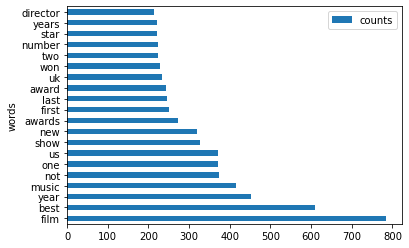

In [79]:
top_twenty=ent_words.nlargest(20, ['counts'])
ax = top_twenty.plot.barh(x=None, y='counts', rot=0)

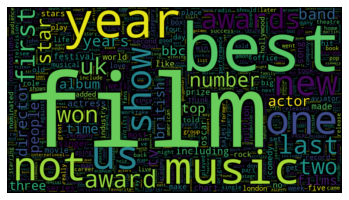

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(entertainment_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [81]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(np.array(v))

sentence_vectors=np.array(sentence_vectors)

In [82]:
def cosine_similarities(mat):
  norm = (mat.T * mat.T).sum(0, keepdims=True) ** .5
  return (mat @ mat.T ) / norm.T / norm 

sim_mat=cosine_similarities(sentence_vectors)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [86]:
from scipy import sparse
sim_mat[sim_mat < 0.9]=0
for i in range(6777):
  sim_mat[i,i] = 0
sim_mat[np.isnan(sim_mat)] =0
sparse_mat = sparse.csr_matrix(sim_mat)
sparse_mat.eliminate_zeros()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


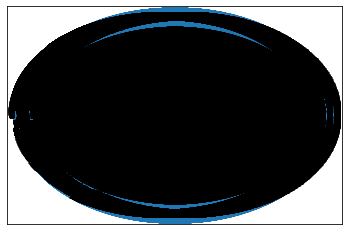

In [87]:
SimilarityGraph = nx.from_scipy_sparse_matrix(sparse_mat)
#print the graph
nx.draw_networkx(SimilarityGraph,pos=nx.shell_layout(SimilarityGraph), with_labels=True)

In [88]:
scores = nx.pagerank(SimilarityGraph)
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)
# Extract top 10 sentences as the summary
for i in range(10):
  print(ranked_sentences[i][1])

["I believe that Childrens classics should be left well alone, and I will not be surprised if the Magic Roundabout does not do well at the Box Office, especially since it will be going up against The Spongebob Squarepants movie, popular among children because it's original, witty, and modern"]
['"They give me a new energy when I see the best coming out of England and every two or three years is a whole new cycle of tough and young film-makers, and even the older ones are making good films']
[' The book, which has become an international best-seller in little over two years, is set to be made into a film starring Tom Hanks']
['While I am biassed in that I thought Love Will Tear Us Apart should have won, in all seriousness, I think that the best song of the last 25 years should not include songs less than 5 years old as that would exclude songs which are popular because of novelty']
[' We wanted people who would still be around in 20 years, not just the winner of Big Brother to take part